# Final Project
## Assignment Instructions

Create a multivariate prediction model and perform data analyis of a dataset you choose. This can be either a linear regression, or a classification. 
This includes:

* 1 point - All code blocks run without error. 
* 2 points - Create 2 charts exploring the data with respect to the prediction variable (label)
* 2 points - Create a hypothesis and perform a t.test to reject or fail to reject that hypothesis
* 1 point - Split the data into training set and testing set for each model and wrangle the data as desired
* 3 points - Create 2 prediction models of your chosen type (regression | classification), with at least one multivariate model  including visualizing the results of each model
* 2 points - Compare the performance of your models
* 1 point - Include a written analysis of your prediction referencing using data to support your conclusions.

The above is what is required to achieve full credit for the assignment. You are welcome and encouraged to go above and beyond these requirements, just be sure these requirements are fully met first. 

## R Features
* You are welcome to use any feature covered in this class
* You are welcome to load any library that is already installed in the virtual environment, but you cannot install new packages. You can also reference installed packages by library name::function_name to avoid naming conflicts
* Use set.seed() as necessary to ensure reproducability as the instructor / TA will run the code to grade it
* Ensure your code runs to completion within 60 minutes from start to finish. You may save and load pre-trained models with your instructor's prior permission if you feel you need to exceed this time limit.

## Dataset
* Your choice. Be sure the data lends itself to supervised learning, with a label and is appropriate for either regression or classification. Remove any personally identifiable data. 
* Suggested data source [UCI Machine Learning Repository](http://mlr.cs.umass.edu/ml/datasets.html) and look for Data Types == Multivariate and Default Task in (Classification, Regression)
* The data would need to be uploaded to the virtual environment such that the instructor or TA can run the code without error. 

In [1]:
# Load libraries
# Load any additional libraries. No install.package()
library(lubridate)
library(tidyverse)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


# Load and explore data structure

In [2]:
# Load data and select columns as necessary
wine <- "winemag-data_first150k.csv" %>% read_csv()

wine <- wine %>% rename(id = X1)
wine <- wine  %>% 
    mutate_if(is.character, factor) %>% 
    mutate(value = points/price)  %>% 
    mutate(nameLength = str_length(designation))  %>% 
    select(-description, -region_2, -winery, -designation)  %>%
    rename(region = region_1)  %>% 
    filter(complete.cases(.))  %>% 
    filter(price < 400)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  country = col_character(),
  description = col_character(),
  designation = col_character(),
  points = col_integer(),
  price = col_double(),
  province = col_character(),
  region_1 = col_character(),
  region_2 = col_character(),
  variety = col_character(),
  winery = col_character()
)


In [3]:
# filter out all data except for wines from Washington, Oregon, and Napa Valley
pnw_wine  <- wine  %>% 
    filter (province %in% c("Washington", "Oregon") | region == "Napa Valley")

pnw_wine  %>% glimpse()
pnw_wine %>% summary()

Observations: 12,743
Variables: 9
$ id         <int> 0, 3, 8, 11, 12, 14, 15, 20, 26, 27, 29, 34, 55, 58, 67,...
$ country    <fct> US, US, US, US, US, US, US, US, US, US, US, US, US, US, ...
$ points     <int> 96, 96, 95, 95, 95, 95, 95, 95, 94, 94, 94, 90, 90, 90, ...
$ price      <dbl> 235, 65, 65, 48, 48, 185, 90, 24, 62, 105, 60, 42, 69, 3...
$ province   <fct> California, Oregon, Oregon, Oregon, Oregon, Oregon, Oreg...
$ region     <fct> Napa Valley, Willamette Valley, Chehalem Mountains, Ribb...
$ variety    <fct> Cabernet Sauvignon, Pinot Noir, Pinot Noir, Pinot Noir, ...
$ value      <dbl> 0.4085106, 1.4769231, 1.4615385, 1.9791667, 1.9791667, 0...
$ nameLength <int> 17, 7, 6, 31, 14, 14, 6, 10, 13, 7, 15, 19, 10, 11, 5, 1...


       id                           country          points      
 Min.   :     0   US                    :12743   Min.   : 80.00  
 1st Qu.: 34236   Albania               :    0   1st Qu.: 87.00  
 Median : 72323   Argentina             :    0   Median : 89.00  
 Mean   : 72868   Australia             :    0   Mean   : 89.13  
 3rd Qu.:111340   Austria               :    0   3rd Qu.: 91.00  
 Max.   :150916   Bosnia and Herzegovina:    0   Max.   :100.00  
                  (Other)               :    0                   
     price                    province                        region    
 Min.   :  7.00   Washington      :6122   Napa Valley            :3507  
 1st Qu.: 23.00   California      :3507   Columbia Valley (WA)   :2883  
 Median : 35.00   Oregon          :3114   Willamette Valley      :1463  
 Mean   : 40.64   Achaia          :   0   Yakima Valley          : 788  
 3rd Qu.: 50.00   Aconcagua Costa :   0   Walla Walla Valley (WA): 750  
 Max.   :300.00   Aconcagua Valley

# Data processing
Create a new data frame(s) with appropriate data types and data cleaning for the data.

In [4]:
# Create dataframes for t-tests
# Split by location
wa_wine <- pnw_wine  %>% filter(province == "Washington")
or_wine <- pnw_wine  %>% filter(province == "Oregon")
napa_wine <- pnw_wine  %>% filter(province == "California")

# Split by points
high_points <- pnw_wine %>% filter(points > 89)
low_points <- pnw_wine %>% filter(points < 90)

# Split by name length
short_name  <- pnw_wine  %>% filter(nameLength < 15)
long_name  <- pnw_wine  %>% setdiff(short_name)

# Explore prediction variable

## Chart 1

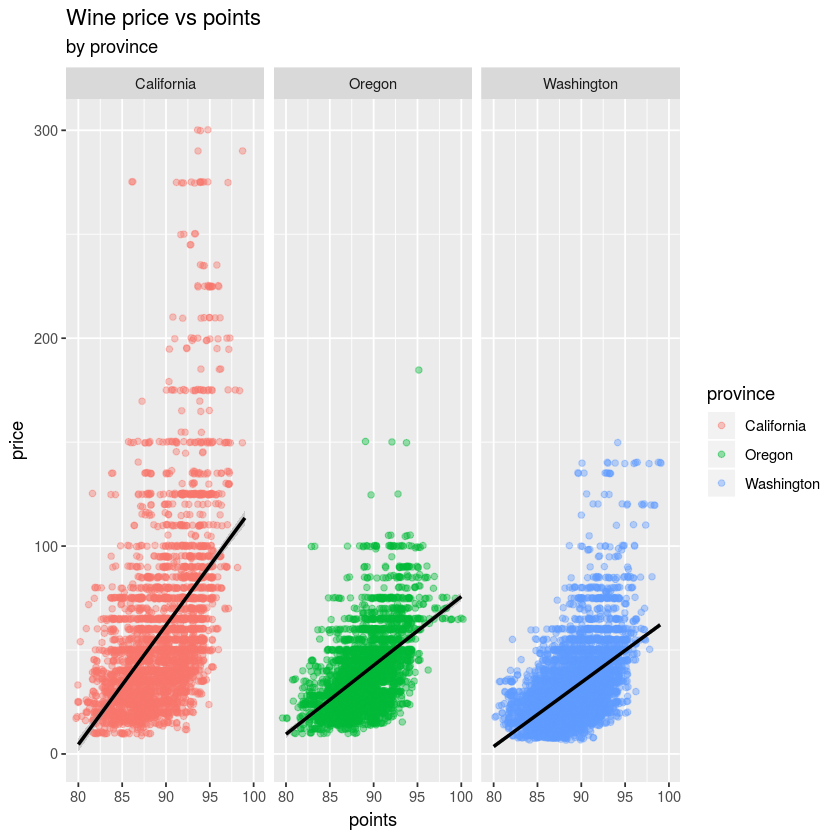

In [5]:
# explore the relationship of points to price
pnw_wine %>% filter (price < 400) %>% 
ggplot(aes(x=points,y=price, color = province)) + 
   geom_jitter(alpha = 0.4) + 
   geom_smooth(method = "lm", color = "black") +
   facet_grid(~province) +
   labs(title="Wine price vs points",
       subtitle="by province")

## Chart 2

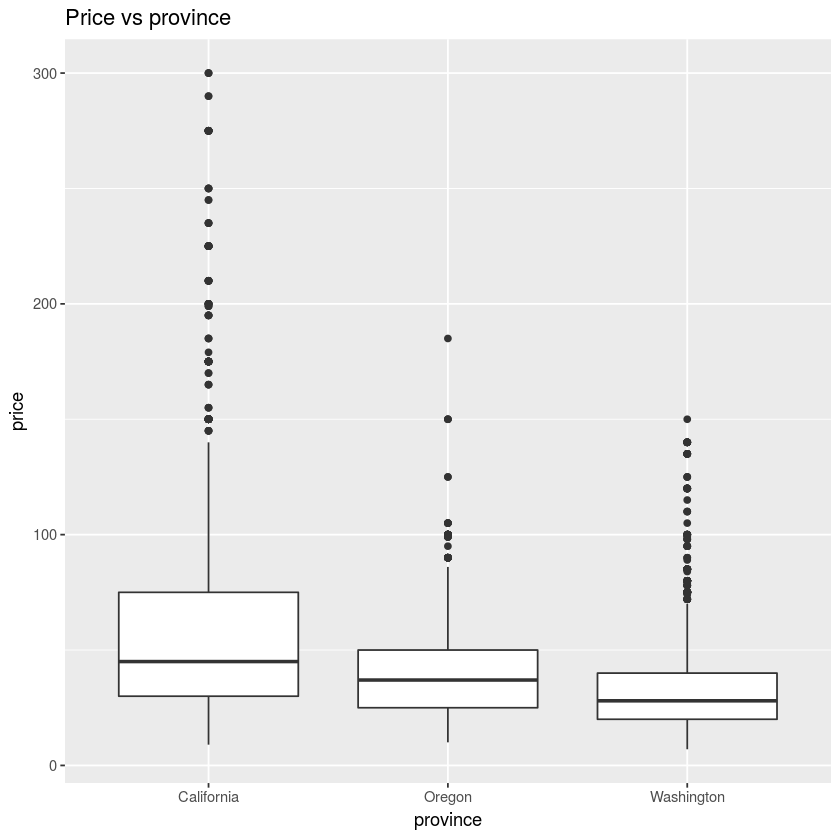

In [6]:
# explore how the province impacts price
pnw_wine  %>% ggplot(mapping = aes(x = province, y = price)) +
    geom_boxplot() +
   labs(title="Price vs province")

## Chart 3

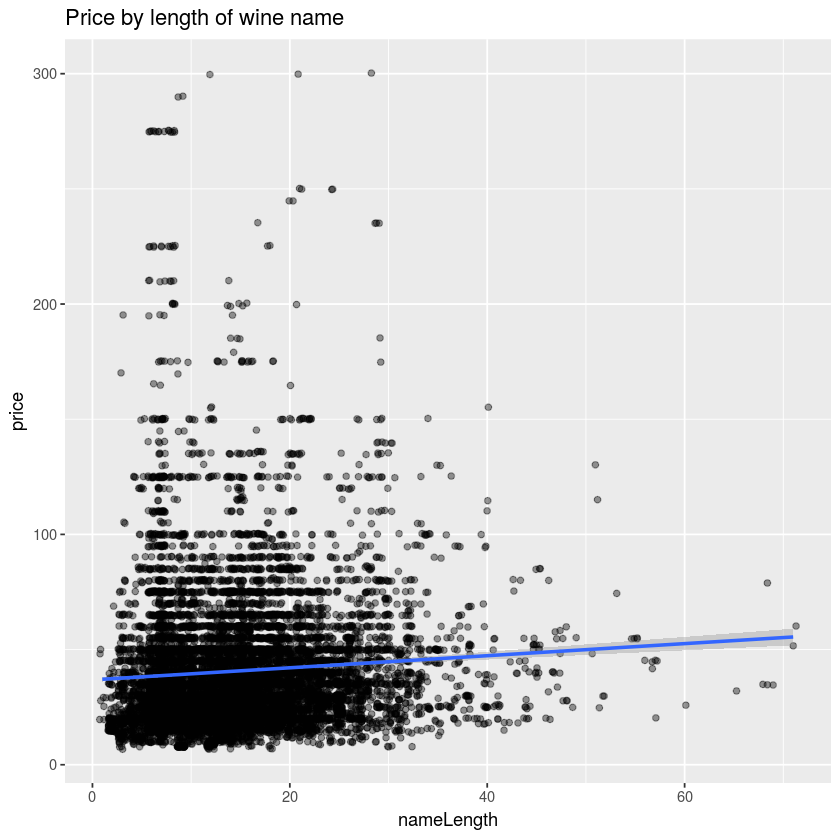

In [7]:
# Explore how name length impacts price
pnw_wine %>% 
ggplot(aes(x=nameLength,y=price)) + 
   geom_jitter(alpha = 0.4) + 
   geom_smooth(method = "lm") +
   labs(title="Price by length of wine name")

# Hypothesis Testing

In [8]:
# compare price by high points (above median) vs. low points (below median)
cat("\n**** Price of High Points Wine > Price of Low Points Wine ****")
t.test (high_points$price, low_points$price, conf.level = 0.95 , alternative="greater")


**** Price of High Points Wine > Price of Low Points Wine ****


	Welch Two Sample t-test

data:  high_points$price and low_points$price
t = 41.268, df = 8937.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 19.27214      Inf
sample estimates:
mean of x mean of y 
 51.34482  31.27255 


In [9]:
# compare price by province
cat("\n**** Price of CA wine != WA wine ****")
t.test (napa_wine$price, wa_wine$price, conf.level = 0.95 , alternative="two.sided")

cat("\n**** Price of CA wine != OR wine ****")
t.test (napa_wine$price, or_wine$price, conf.level = 0.95 , alternative="two.sided")

cat("\n**** Price of OR wine != WA wine ****")
t.test (or_wine$price, wa_wine$price, conf.level = 0.95 , alternative="two.sided")


**** Price of CA wine != WA wine ****


	Welch Two Sample t-test

data:  napa_wine$price and wa_wine$price
t = 35.474, df = 4233.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 24.18228 27.01159
sample estimates:
mean of x mean of y 
 57.26747  31.67053 



**** Price of CA wine != OR wine ****


	Welch Two Sample t-test

data:  napa_wine$price and or_wine$price
t = 23.153, df = 5056.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 16.21338 19.21301
sample estimates:
mean of x mean of y 
 57.26747  39.55427 



**** Price of OR wine != WA wine ****


	Welch Two Sample t-test

data:  or_wine$price and wa_wine$price
t = 19.64, df = 5803.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 7.096826 8.670651
sample estimates:
mean of x mean of y 
 39.55427  31.67053 


In [10]:
# compare the price of wines with short name to the price of wines with long names
cat("\n**** Price of wine with short name != price of wine with long name ****")
t.test(short_name$price, long_name$price, alternative = "two.sided", conf.level = 0.95)


**** Price of wine with short name != price of wine with long name ****


	Welch Two Sample t-test

data:  short_name$price and long_name$price
t = -7.6195, df = 12638, p-value = 2.727e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.763619 -2.814197
sample estimates:
mean of x mean of y 
 38.92451  42.71342 


## Additional Data Processing

In [11]:
# normalize features
normalize <- function(x) (x - mean(x))/sd(x)

pnw_wine <- pnw_wine  %>% 
    mutate(normal_points = normalize(points),
           normal_value = normalize(value),
           normal_nameLength = normalize(nameLength))
    
pnw_wine  %>% glimpse()

Observations: 12,743
Variables: 12
$ id                <int> 0, 3, 8, 11, 12, 14, 15, 20, 26, 27, 29, 34, 55, ...
$ country           <fct> US, US, US, US, US, US, US, US, US, US, US, US, U...
$ points            <int> 96, 96, 95, 95, 95, 95, 95, 95, 94, 94, 94, 90, 9...
$ price             <dbl> 235, 65, 65, 48, 48, 185, 90, 24, 62, 105, 60, 42...
$ province          <fct> California, Oregon, Oregon, Oregon, Oregon, Orego...
$ region            <fct> Napa Valley, Willamette Valley, Chehalem Mountain...
$ variety           <fct> Cabernet Sauvignon, Pinot Noir, Pinot Noir, Pinot...
$ value             <dbl> 0.4085106, 1.4769231, 1.4615385, 1.9791667, 1.979...
$ nameLength        <int> 17, 7, 6, 31, 14, 14, 6, 10, 13, 7, 15, 19, 10, 1...
$ normal_points     <dbl> 2.2412696, 2.2412696, 1.9150727, 1.9150727, 1.915...
$ normal_value      <dbl> -1.52427655, -0.90221342, -0.91117082, -0.6097914...
$ normal_nameLength <dbl> 0.32635057, -0.96677296, -1.09608531, 2.13672350,...


# Split into train / test sets

In [12]:
# Set seed for predictability
set.seed(1222)

# Get 70% of the data for training
wine_train <- pnw_wine %>% 
  sample_frac(0.7)

# Creat test set with the remaining rows
wine_test <- pnw_wine %>%  
  setdiff(wine_train)

# Display row counts of train and test data
print(str_c("wine_train rows: ", nrow(wine_train)))
print(str_c("wine_test rows: ", nrow(wine_test)))

# Compare train and test data to original data source
nrow(wine_train) + nrow(wine_test) == nrow(pnw_wine)

[1] "wine_train rows: 8920"
[1] "wine_test rows: 3823"


[1] TRUE

# Train and test models

## Model 1
Update this text to summarize this result.

In [13]:
# create model to predict price
model = lm(price ~  normal_points + province + normal_nameLength, data = wine_train)
model$coefficients

summary(model)
confint(model)

(Intercept)      normal_points     provinceOregon provinceWashington 
         57.306510          12.435148         -17.228171         -25.740400 
 normal_nameLength 
          1.385838


Call:
lm(formula = price ~ normal_points + province + normal_nameLength, 
    data = wine_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.225 -12.774  -2.928   8.420 231.905 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         57.3065     0.4662 122.920  < 2e-16 ***
normal_points       12.4351     0.2464  50.460  < 2e-16 ***
provinceOregon     -17.2282     0.6777 -25.420  < 2e-16 ***
provinceWashington -25.7404     0.5886 -43.728  < 2e-16 ***
normal_nameLength    1.3858     0.2483   5.582 2.45e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.16 on 8915 degrees of freedom
Multiple R-squared:  0.3411,	Adjusted R-squared:  0.3408 
F-statistic:  1154 on 4 and 8915 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),56.3926281,58.220391
normal_points,11.9520790,12.918218
provinceOregon,-18.5567018,-15.899641
provinceWashington,-26.8942887,-24.586511
normal_nameLength,0.8991588,1.872518


## Model 2
Update this text to summarize this result.

In [14]:
# create second model to predict price
model2 = lm(price ~  normal_points + normal_value + province + normal_nameLength, data = wine_train)
model$coefficients

summary(model2)
confint(model2)

(Intercept)      normal_points     provinceOregon provinceWashington 
         57.306510          12.435148         -17.228171         -25.740400 
 normal_nameLength 
          1.385838


Call:
lm(formula = price ~ normal_points + normal_value + province + 
    normal_nameLength, data = wine_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.549  -8.989  -3.774   3.196 215.856 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         50.2567     0.3984 126.139   <2e-16 ***
normal_points        6.4059     0.2228  28.756   <2e-16 ***
normal_value       -15.5333     0.2380 -65.275   <2e-16 ***
provinceOregon     -12.8136     0.5616 -22.816   <2e-16 ***
provinceWashington -13.3567     0.5201 -25.683   <2e-16 ***
normal_nameLength   -0.4737     0.2062  -2.297   0.0216 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.06 on 8914 degrees of freedom
Multiple R-squared:  0.5542,	Adjusted R-squared:  0.554 
F-statistic:  2216 on 5 and 8914 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),49.475652,51.03765527
normal_points,5.969219,6.84257671
normal_value,-15.999753,-15.06680919
provinceOregon,-13.914472,-11.71274900
provinceWashington,-14.376100,-12.33721558
normal_nameLength,-0.877884,-0.06944687


# Model Performance Comparison

In [15]:
# assess how well the model predicts the test data
# calculate the predicted score and residuals for Model 1
wine_test1 <- wine_test %>% 
  mutate(predicted_price = predict(model, newdata = wine_test),
        resids = price - predicted_price)  %>% 
  select(price, predicted_price, resids)  %>% 
  glimpse()

# calculate the predicted score and residuals for Model 2
wine_test2 <- wine_test %>% 
  mutate(predicted_price = predict(model2, newdata = wine_test),
        resids = price - predicted_price)  %>% 
  select(price, predicted_price, resids)  %>% 
  glimpse()

Observations: 3,823
Variables: 3
$ price           <dbl> 48, 48, 185, 24, 42, 85, 54, 42, 93, 30, 36, 20, 58...
$ predicted_price <dbl> 66.85370, 63.80720, 63.80720, 80.31855, 35.90947, 6...
$ resids          <dbl> -18.8537044, -15.8072022, 121.1927978, -56.3185495,...
Observations: 3,823
Variables: 3
$ price           <dbl> 48, 48, 185, 24, 42, 85, 54, 42, 93, 30, 36, 20, 58...
$ predicted_price <dbl> 58.17077, 59.21204, 72.46735, 54.37114, 46.43440, 7...
$ resids          <dbl> -10.1707732, -11.2120367, 112.5326517, -30.3711418,...


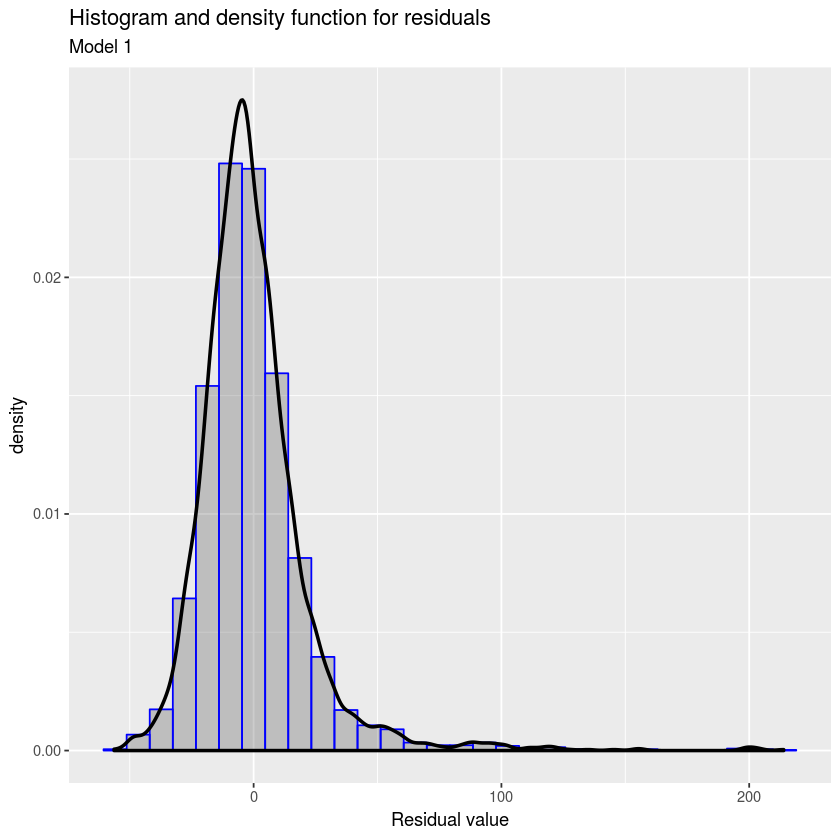

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


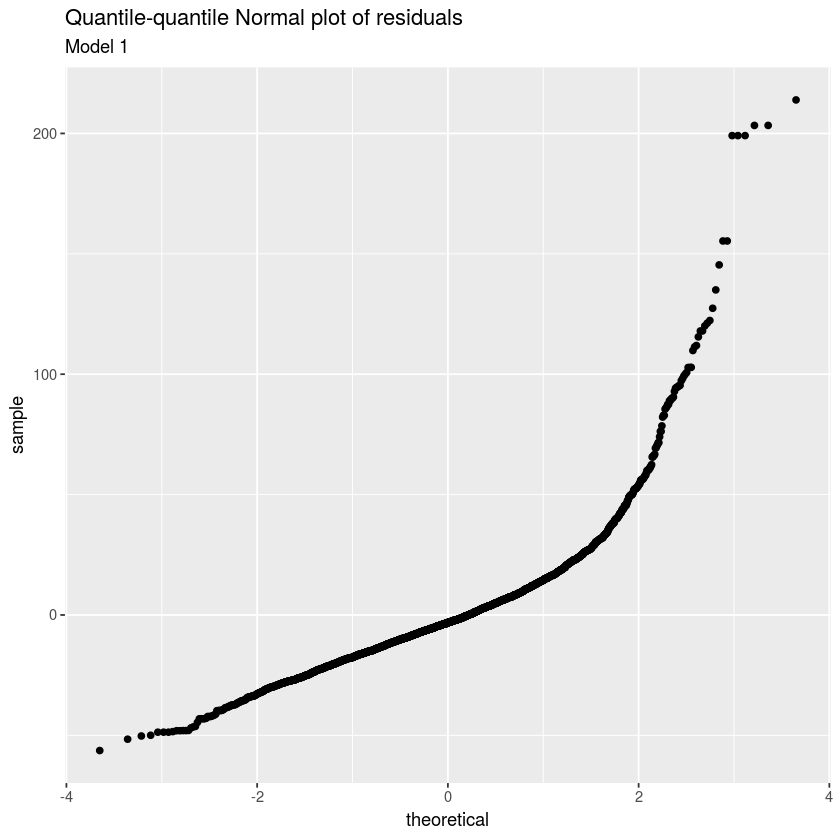

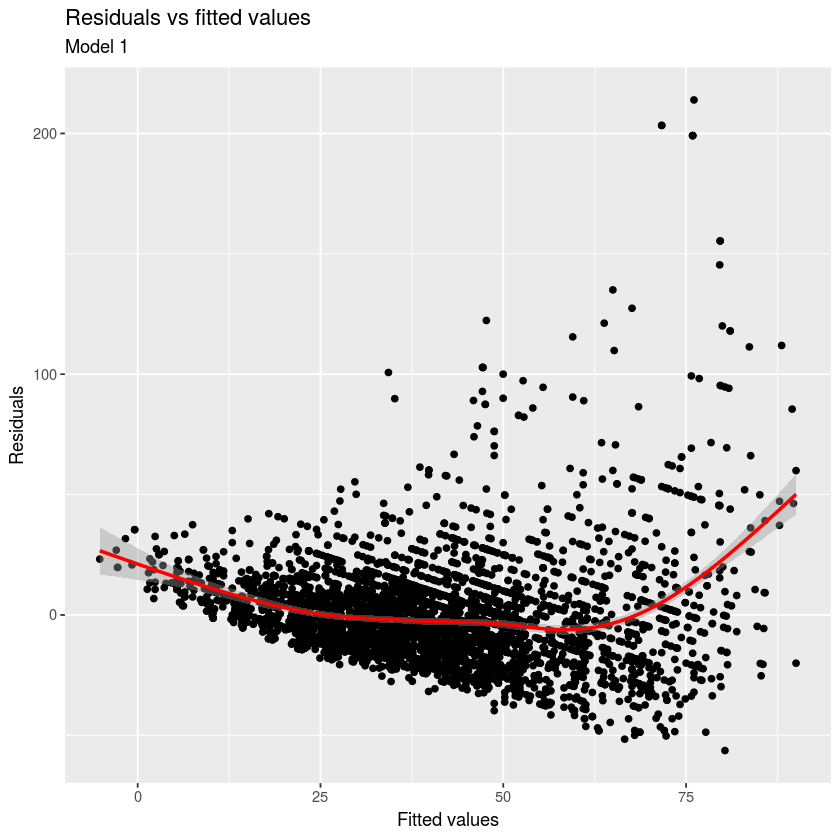

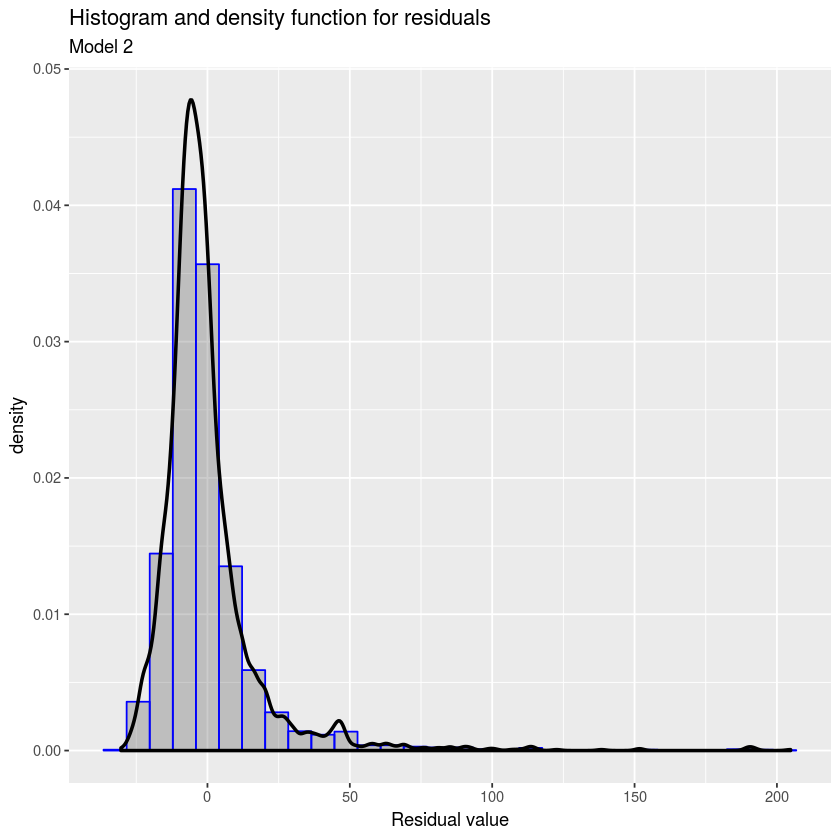

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


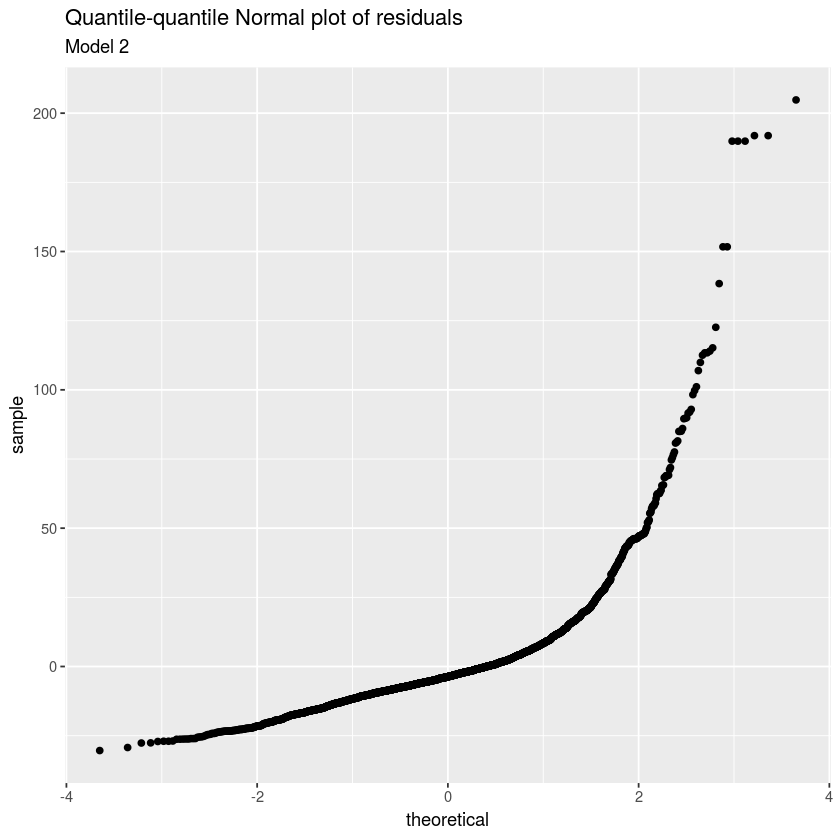

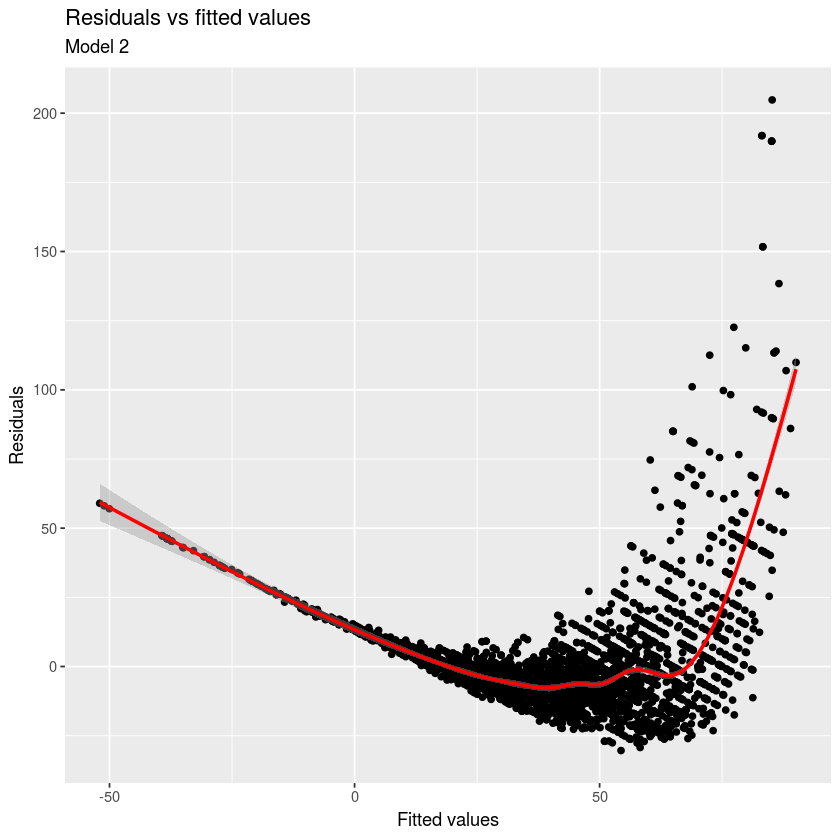

In [16]:
# Create a function to print the same plots to compare the residuals for Model 1 and Model 2
plot_resids <- function(df, model){
  # Plot both a histogram and a density plot
  p1 <- df %>% 
    ggplot(aes(resids, ..density..)) + 
    geom_histogram(bins = 30, alpha = 0.3, color = 'blue') +
    geom_density(size = 1) +
    labs(title="Histogram and density function for residuals", subtitle = model, x="Residual value")
  
  # Plot a qq plot
  p2 <- df %>% 
    ggplot(aes(sample = resids)) + 
    geom_qq() + 
    labs(title="Quantile-quantile Normal plot of residuals", subtitle = model)
  
  # Plot a scatter
  p3 <- df %>% 
    ggplot(aes(x = predicted_price, y = resids)) +
      geom_point() + 
      geom_smooth(size = 1, color = 'red') +
      labs(title="Residuals vs fitted values", subtitle = model, x="Fitted values", y="Residuals")
  
  # Print the plots
  p1 %>% print()
  p2 %>% print()
  p3 %>% print()
}

plot_resids(wine_test1, "Model 1")
plot_resids(wine_test2, "Model 2")

# Analysis and Conclusions
We explored what wine characteristics may impact the price of a bottle of wine for our final project, using the Wine Reviews data set from Wine Enthusiast sourced from Kaggle. In summary, the features that we assessed were statistically significant in both our t-tests and our regression models.

We examined province (Napa Valley, CA; WA state, OR state), value (points/price), points, and the name length of a bottle of wine as our features. Our initial plots showed potential differences in price by these features. The t-tests tested the hypotheses that more highly rated wine would cost more, cost differs by province, and cost differs by name length. Using a 95% confidence interval, we rejected the null hypothesis in each t-test.

As a result, we chose to include each of these features in our regression models. In our first model, we predict price by points, province, and name length. All of the coefficients were significant so it appeared to be a reasonable fit, but the adjusted r-squared was only 0.3408. In hopes of getting a more predictive model, we added value to our second model. Model 2 did have a higher adjusted r-squared of 0.554. However, in analyzing the residuals, we found that the residuals of the second model were less normally distributed and more biased. Another unexpected result of Model 2 was that name length had a negative coefficient; this differed from the relationship we noticed in the initial plots and T-tests. Perhaps this model is over-fitted.

In conclusion, all of the features we assessed help explain price:
- Province does help explain price, with CA having more expensive wines, and WA having less expensive wines
- You pay more for a higher wine rating
- Generally, you pay more for a longer name, but one of the models is mistreating name length

Both of our models were not normally distributed, and had low adjusted R-squared values. This suggests that there is still unexplained variation in wine price that is outside our data set.